In [1]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


# **Data Cleaning**
- Clean and normalize data in london_underground_activity and
london_underground_station_info datasets
- Remove duplicates, nulls and outliers
- Standardize column names and data types

In [3]:
import pandas as pd
df1 = pd.read_csv('/content/gdrive/MyDrive/data/project_london/london_underground_activity.csv')
df1.head()

,year,nlc,station,area,weekday_entry,weekday_exit,saturday_entry,saturday_exit,sunday_entry,sunday_exit,annual_entry_and_exit
0,2007,500,Acton Town,Ealing,9205,8899.0,6722,6320,4427,4304,5.77
1,2007,502,Aldgate,City of London,9887,10397.0,2191,2587,1484,1772,5.57
2,2007,503,Aldgate East,Tower Hamlets,12820,12271.0,7040,6220,5505,5000,7.66
3,2007,505,Alperton,Brent,4611,4719.0,3354,3450,2433,2503,3.01
4,2007,506,Amersham,Chiltern,4182,3938.0,1709,1585,1004,957,2.34


In [4]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2953 entries, 0 to 2952
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   year                   2953 non-null   int64  
 1   nlc                    2953 non-null   int64  
 2   station                2953 non-null   object 
 3   area                   2946 non-null   object 
 4   weekday_entry          2953 non-null   int64  
 5   weekday_exit           2953 non-null   float64
 6   saturday_entry         2953 non-null   int64  
 7   saturday_exit          2953 non-null   int64  
 8   sunday_entry           2953 non-null   int64  
 9   sunday_exit            2953 non-null   int64  
 10  annual_entry_and_exit  2953 non-null   float64
dtypes: float64(2), int64(7), object(2)
memory usage: 253.9+ KB


In [8]:
df1 = df1.dropna()
df1.isnull().values.any()

False

In [6]:
# Selecting duplicate rows except first
# occurrence based on all columns
duplicate = df1[df1.duplicated()]
 
print("Duplicate Rows :")
 
# Print the resultant Dataframe
duplicate

Duplicate Rows :


,year,nlc,station,area,weekday_entry,weekday_exit,saturday_entry,saturday_exit,sunday_entry,sunday_exit,annual_entry_and_exit


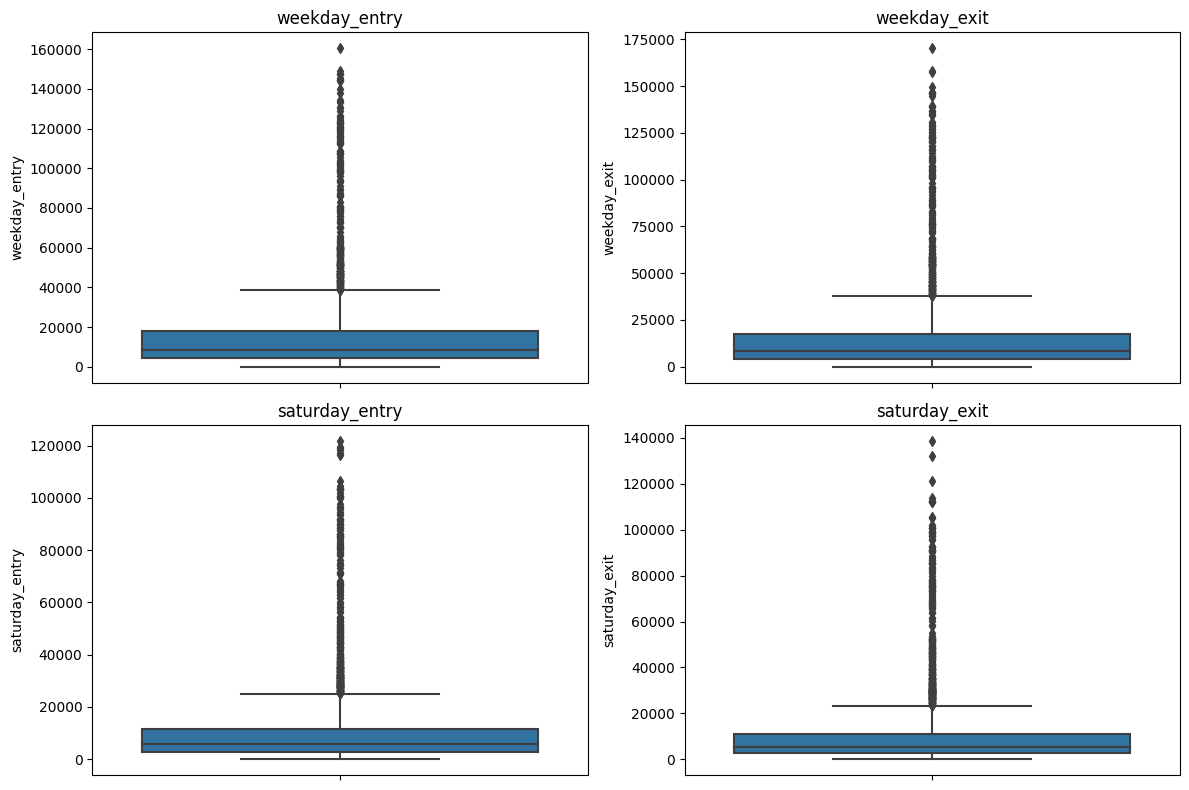

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
sns.boxplot(data=df1, y='weekday_entry')
plt.title('weekday_entry')

plt.subplot(2, 2, 2)
sns.boxplot(data=df1, y='weekday_exit')
plt.title('weekday_exit')

plt.subplot(2, 2, 3)
sns.boxplot(data=df1, y='saturday_entry')
plt.title('saturday_entry')

plt.subplot(2, 2, 4)
sns.boxplot(data=df1, y='saturday_exit')
plt.title('saturday_exit')

plt.tight_layout()
plt.show()

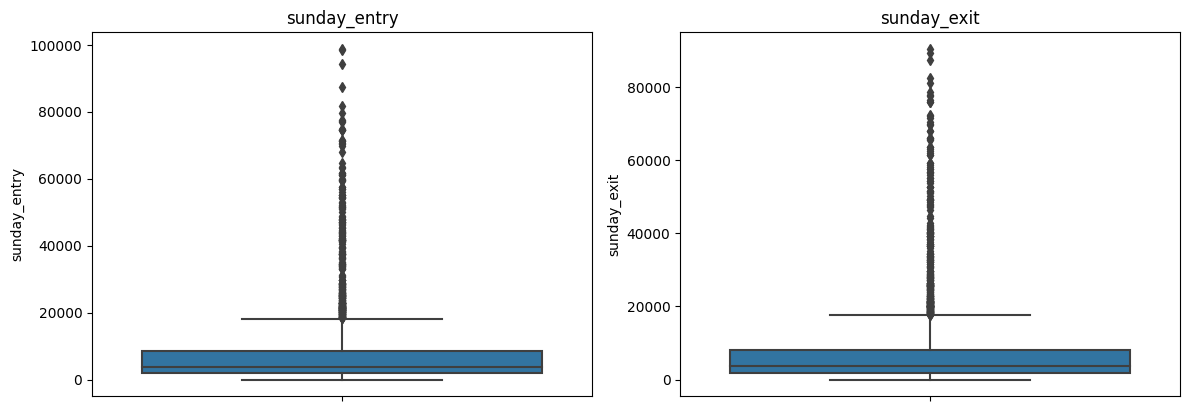

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
sns.boxplot(data=df1, y='sunday_entry')
plt.title('sunday_entry')

plt.subplot(2, 2, 2)
sns.boxplot(data=df1, y='sunday_exit')
plt.title('sunday_exit')

plt.tight_layout()
plt.show()

In [14]:
import pandas as pd
df2 = pd.read_csv('/content/gdrive/MyDrive/data/project_london/london_underground_station_info.csv')
df2.head()

,station,line,local_authority,zone,opened
0,Acton Town,District,Ealing,3,1879-07-01
1,Aldgate,Metropolitan[a],City of London,1,1876-11-18
2,Aldgate East,Hammersmith & City[d],Tower Hamlets,1,1884-10-06
3,Alperton,Piccadilly[h],Brent,4,1903-06-28
4,Amersham,Metropolitan,Chiltern,9,1892-09-01


In [15]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 269 entries, 0 to 268
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   station          269 non-null    object
 1   line             269 non-null    object
 2   local_authority  269 non-null    object
 3   zone             269 non-null    object
 4   opened           269 non-null    object
dtypes: object(5)
memory usage: 10.6+ KB


In [16]:
df2.isnull().values.any()

False

In [20]:
# Selecting duplicate rows except first
# occurrence based on all columns
duplicate = df2[df2.duplicated()]
 
print("Duplicate Rows :")
 
# Print the resultant Dataframe
print(duplicate)

Duplicate Rows :
Empty DataFrame
Columns: [station, line, local_authority, zone, opened]
Index: []


# **Feature Engineering**
- Population density for each borough
- Average income per borough
- Total ticket sales per borough

# **Models**
- Try linear regression, lasso and random forest to predict:
- Underground station entries/exits per borough
- Transport infrastructure spending per borough
# **Evaluate models using**
- Mean squared error
- R2 score


In [23]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Select the relevant columns for prediction and evaluation
# Replace 'borough', 'entries_exits', and 'infrastructure_spending' with the actual column names in your dataset
df = df1[['area', 'annual_entry_and_exit']].copy()

# Perform one-hot encoding for the 'borough' column
borough_encoded = pd.get_dummies(df['area'], prefix='area')

# Concatenate the encoded borough with the original dataframe
df_encoded = pd.concat([df.drop('area', axis=1), borough_encoded], axis=1)

# Split the data into training and testing sets
X = df_encoded.drop(['annual_entry_and_exit'], axis=1)
y_entries_exits = df_encoded['annual_entry_and_exit']
X_train, X_test, y_train_entries_exits, y_test_entries_exits = train_test_split(X, y_entries_exits, test_size=0.2, random_state=42)

# Train and evaluate linear regression model for underground station entries/exits
lr_entries_exits = LinearRegression()
lr_entries_exits.fit(X_train, y_train_entries_exits)
lr_entries_exits_pred = lr_entries_exits.predict(X_test)
lr_entries_exits_mse = mean_squared_error(y_test_entries_exits, lr_entries_exits_pred)
lr_entries_exits_r2 = r2_score(y_test_entries_exits, lr_entries_exits_pred)

# Train and evaluate Lasso model for underground station entries/exits
lasso_entries_exits = Lasso()
lasso_entries_exits.fit(X_train, y_train_entries_exits)
lasso_entries_exits_pred = lasso_entries_exits.predict(X_test)
lasso_entries_exits_mse = mean_squared_error(y_test_entries_exits, lasso_entries_exits_pred)
lasso_entries_exits_r2 = r2_score(y_test_entries_exits, lasso_entries_exits_pred)

# Train and evaluate random forest model for underground station entries/exits
rf_entries_exits = RandomForestRegressor()
rf_entries_exits.fit(X_train, y_train_entries_exits)
rf_entries_exits_pred = rf_entries_exits.predict(X_test)
rf_entries_exits_mse = mean_squared_error(y_test_entries_exits, rf_entries_exits_pred)
rf_entries_exits_r2 = r2_score(y_test_entries_exits, rf_entries_exits_pred)


# Print the evaluation results
print("Underground Station Entries/Exits:")
print("Linear Regression - MSE:", lr_entries_exits_mse)
print("Linear Regression - R2 Score:", lr_entries_exits_r2)
print("Lasso - MSE:", lasso_entries_exits_mse)
print("Lasso - R2 Score:", lasso_entries_exits_r2)
print("Random Forest - MSE:", rf_entries_exits_mse)
print("Random Forest - R2 Score:", rf_entries_exits_r2)

Underground Station Entries/Exits:
Linear Regression - MSE: 158.3065273612914
Linear Regression - R2 Score: 0.24714747192780984
Lasso - MSE: 207.1200915934977
Lasso - R2 Score: 0.015006600360585876
Random Forest - MSE: 158.68476397600256
Random Forest - R2 Score: 0.2453487059745595
